In [104]:
#from IPython.display import Image
#from IPython.core.display import HTML
import httplib, urllib, base64, json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

faceApiSubscriptionKey = "[FACE API PRIMARY KEY]"

baseFaceUrl = "https://raw.githubusercontent.com/deldersveld/\
CortanaAnalyticsLabs/master/PerceptualIntelligence/Images/"

thumbsUp = baseFaceUrl + "ThumbsUp.png"
faceA = baseFaceUrl + "FaceA.png"
faceB = baseFaceUrl + "FaceB.png"
faceC = baseFaceUrl + "FaceC.png"
faceD = baseFaceUrl + "FaceD.png"
faceE = baseFaceUrl + "FaceE.png"

In [97]:
def detect(apiKey, imageUrl):
    jsonBody = '{"url":"' + imageUrl + '"}'

    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': apiKey,
    }

    params = urllib.urlencode({
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender',
    })

    try:
        conn = httplib.HTTPSConnection('api.projectoxford.ai')
        conn.request("POST", "/face/v1.0/detect?%s" % params, jsonBody, headers)
        response = conn.getresponse()
        data = response.read()
        print(data)
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))
        
    return data

def createFaceList(apiKey, faceListId):
    faceList = faceListId
    jsonBody = '{"name":"' + faceList + '", "userData":"User-provided data attached to the face list"}'
    
    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': apiKey,
    }

    params = urllib.urlencode({
    })

    try:
        conn = httplib.HTTPSConnection('api.projectoxford.ai')
        conn.request("PUT", "/face/v1.0/facelists/" + faceList + "?%s" % params, jsonBody, headers)
        response = conn.getresponse()
        data = response.read()
        print(data)
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))
        
def addFaceToFaceList(apiKey, faceListId, imageUrl):
    faceList = faceListId
    jsonBody = '{"url":"' + imageUrl + '"}'
    
    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': apiKey,
    }

    params = urllib.urlencode({
    })

    try:
        conn = httplib.HTTPSConnection('api.projectoxford.ai')
        conn.request("POST", "/face/v1.0/facelists/" + faceList + "/persistedFaces?%s" % params, jsonBody, headers)
        response = conn.getresponse()
        data = response.read()
        print(data)
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))
        
def findSimilars(apiKey, faceListId, faceId, numberOfCandidates):
    jsonBody = '{"faceId":"' + faceId + '", \
                "faceListId":"' + faceListId + '", \
                "maxNumOfCandidatesReturned":' + numberOfCandidates + '}'
    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': apiKey,
    }

    params = urllib.urlencode({
    })

    try:
        conn = httplib.HTTPSConnection('api.projectoxford.ai')
        conn.request("POST", "/face/v1.0/findsimilars?%s" % params, jsonBody, headers)
        response = conn.getresponse()
        data = response.read()
        print(data)
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))

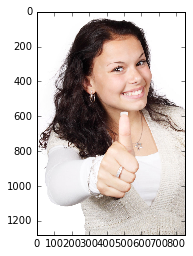

In [108]:
img = mpimg.imread(thumbsUp)
plt.imshow(img)

In [107]:
detect(faceApiSubscriptionKey, thumbsUp)

[{"faceId":"7fc362fb-2e34-419d-ab67-41af3d357f34","faceRectangle":{"top":231,"left":391,"width":304,"height":304},"faceAttributes":{"gender":"female","age":31.6}}]


'[{"faceId":"7fc362fb-2e34-419d-ab67-41af3d357f34","faceRectangle":{"top":231,"left":391,"width":304,"height":304},"faceAttributes":{"gender":"female","age":31.6}}]'

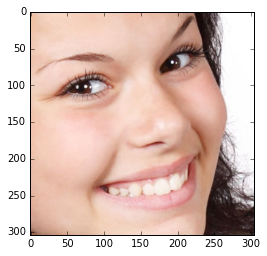

In [94]:
face = json.loads(data)
thumbsUpFaceId = face[0]["faceId"]
faceTop = face[0]["faceRectangle"]["top"]
faceLeft = face[0]["faceRectangle"]["left"]
faceWidth = face[0]["faceRectangle"]["width"]
faceHeight = face[0]["faceRectangle"]["height"]

img = mpimg.imread(thumbsUp)
plt.imshow(img[faceTop:faceTop + faceHeight, faceLeft:faceLeft + faceWidth])

In [80]:
createFaceList(faceApiSubscriptionKey, "sample")

{"error":{"code":"FaceListExists","message":"Face list 'sample' already exists."}}
[{"faceListId":"sample","name":"sample","userData":"User-provided data attached to the face list"}]


[{"faceId":"426b81e0-3a37-4ade-b8af-f2ac87872be0","faceRectangle":{"top":252,"left":509,"width":345,"height":345},"faceAttributes":{"gender":"female","age":23.4}}]
{"persistedFaceId":"490b9f9d-944f-484f-a17c-f38046afcfd9"}


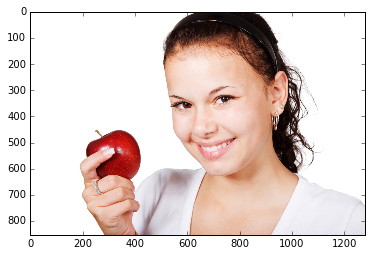

In [95]:
img = mpimg.imread(faceA)
plt.imshow(img)
rawFaceDataA = detect(faceApiSubscriptionKey, faceA)
addFaceToFaceList(faceApiSubscriptionKey, "sample", faceA)

[{"faceId":"18fa0af6-96d8-4f8e-9def-40364ee9328e","faceRectangle":{"top":208,"left":247,"width":295,"height":295},"faceAttributes":{"gender":"female","age":32.0}}]
{"persistedFaceId":"576eaf1f-62ab-4fc5-a4ad-9830956d30a1"}


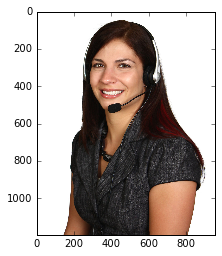

In [74]:
img = mpimg.imread(faceB)
plt.imshow(img)
rawFaceDataB = detect(faceApiSubscriptionKey, faceB)
addFaceToFaceList(faceApiSubscriptionKey, "sample", faceB)

[{"faceId":"f36c4848-e61d-4b32-b2c4-c9d9974f2300","faceRectangle":{"top":296,"left":389,"width":183,"height":183},"faceAttributes":{"gender":"male","age":39.1}}]
{"persistedFaceId":"b394c7b4-3670-414e-b9c1-760262757778"}


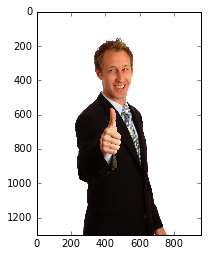

In [75]:
img = mpimg.imread(faceC)
plt.imshow(img)
rawFaceDataC = detect(faceApiSubscriptionKey, faceC)
faceDataC = json.loads(rawFaceDataC)
addFaceToFaceList(faceApiSubscriptionKey, "sample", faceC)

[{"faceId":"def93910-497a-460b-aae1-4ee1e965b722","faceRectangle":{"top":84,"left":309,"width":79,"height":79},"faceAttributes":{"gender":"male","age":24.6}}]
{"persistedFaceId":"65eb185d-dfdd-4d27-b7df-400d5acdb8e8"}


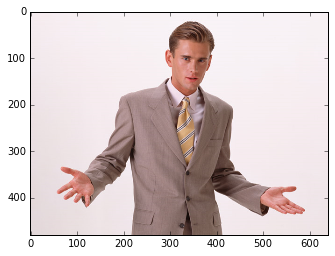

In [76]:
img = mpimg.imread(faceD)
plt.imshow(img)
rawFaceDataD = detect(faceApiSubscriptionKey, faceD)
addFaceToFaceList(faceApiSubscriptionKey, "sample", faceD)

[{"faceId":"e43aaabf-5270-4bc8-a82e-fd6f2103daef","faceRectangle":{"top":75,"left":162,"width":100,"height":100},"faceAttributes":{"gender":"female","age":26.6}}]
{"persistedFaceId":"5ad6021d-f98e-4624-9496-29095c3511bb"}


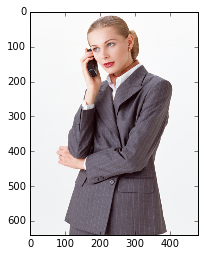

In [77]:
img = mpimg.imread(faceE)
plt.imshow(img)
rawFaceDataE = detect(faceApiSubscriptionKey, faceE)
addFaceToFaceList(faceApiSubscriptionKey, "sample", faceE)

In [91]:
findSimilars(faceApiSubscriptionKey, "sample", thumbsUpFaceId, "5")

[{"persistedFaceId":"4130e136-b8fd-4e49-a2be-415d3ee4e77c","confidence":0.775705636}]
